<h1><b>Week 5 </b></h1><br>

<h2><b>Introduction</b></h2><br>

In this capstone project i would like to explore more on opening a new Indian restaurant. This is study i will be exploring cities San Diego to get better insights for the investors and entrepreneurs who are more interested to open a new restaurant.I will be focusing on available restaurants and what would be the best city and potential restaurants to open aprt from Indian reataurant too. For this project, my main focus will be on analyzing the data using machine learning and comparing both linear and logistics regressions who check which method can provide better prediction after tarining and testing.

<h2><b>Dataset</b></h2><br>

Firstly, the geographical data such as coordianates of the city (San Diego) will be extracted. Then Fouraquare API will be used to get the URIs to get retrive the raw data in JSON format. The details such as "NAME", "CATEGORIES", "LATITUDE", "LONGTITUDE" and "ID" for city will be helping to identify the restaurant available in that place.

The main focus for this project is to identify the available restaurants and most popular ones too. The Foursquare API will provide mor venue categories where data cleanup/removal/filerating need to be inorder to get only restaurant type venues only. Extracting the "LIKES" data will help us to identity the most popular retaurants and to make final decision on the potential opening restaurant around/nearby it. the data will be named as "RAW_DATASET" and will be used in our machine learning process in this project.

<h2><b>Methodology</b></h2><br>

Liner and logistic regression were used in this porject. Linear regression technique has used to predict the "LIKES" to identify the potential restaurant to be open in the dedicated area and Sci-Kit as been implemented for this task.

Logistic regression used as the classification technique in this project.


In [1]:
!pip install folium
!pip install geocoder

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
from geopy.geocoders import Nominatim
import geocoder
import json
import requests
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium 
import matplotlib.pyplot as plt
import pylab as pl
import itertools
import warnings
warnings.filterwarnings('ignore')

from urllib.request import urlopen
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim 
from sklearn import linear_model
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

print('All libraries have been imported')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 3.5 MB/s eta 0:00:011
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |██████████████████████████

In [2]:
city1 = 'San Diego, California'

geolocator = Nominatim(user_agent="foursquare_agent")
location1 = geolocator.geocode(city1)
latitude1 = location1.latitude
longitude1 = location1.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(city1, latitude1, longitude1))

The geograpical coordinate of San Diego, California are 32.7174202, -117.1627728.


In [49]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)


LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# create URLs
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude1, 
    longitude1, 
    radius, 
    LIMIT)

#print(url)

In [14]:
# scrape the data from the generated URLs

city_results = requests.get(url).json()
city_results

# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    

# San Diego CITY   

city_venues = city_results['response']['groups'][0]['items']
nearby_venues = pd.json_normalize(city_venues) # flatten JSON

print(city_venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories','venue.location.address','venue.location.neighborhood','venue.location.lat', 
                    'venue.location.lng', 'venue.id']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print("Done Extract Data!")

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4a5d5b65f964a52094bd1fe3', 'name': 'THE US GRANT, A Luxury Collection Hotel, San Diego', 'location': {'address': '326 Broadway', 'crossStreet': 'at 3rd Ave', 'lat': 32.716204, 'lng': -117.1615507, 'labeledLatLngs': [{'label': 'display', 'lat': 32.716204, 'lng': -117.1615507}], 'distance': 177, 'postalCode': '92101', 'cc': 'US', 'city': 'San Diego', 'state': 'CA', 'country': 'United States', 'formattedAddress': ['326 Broadway (at 3rd Ave)', 'San Diego, CA 92101', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4a5d5b65f964a52094bd1fe3-0'}, {'reasons': {'count': 0, 'items': [{'summary': '

In [5]:
#Printout all the venues for all the cities
nearby_venues

,name,categories,address,neighborhood,lat,lng,id
0,"THE US GRANT, A Luxury Collection Hotel, San D...",Hotel,326 Broadway,NaN,32.716204,-117.161551,4a5d5b65f964a52094bd1fe3
1,Tender Greens,New American Restaurant,110 W Broadway,NaN,32.716082,-117.163925,51d0c254498e603aabbc5bae
2,Grant Grill,American Restaurant,326 Broadway,NaN,32.716125,-117.161084,40e0b100f964a52030021fe3
3,San Diego Civic Theatre,Theater,1100 3rd Ave,Central San Diego,32.717422,-117.162318,4a7bc2a0f964a520c2eb1fe3
4,House of Blues San Diego,Music Venue,1055 5th Ave,Central San Diego,32.716438,-117.159825,428d2880f964a520ac231fe3
5,WestBean Coffee Roasters,Coffee Shop,240 Broadway,NaN,32.715736,-117.162460,54dcf93e498e72ab49cd0ba8
6,Co-Merge Workplace,Business Service,330 A St,NaN,32.719030,-117.161398,4e27120dfa7682ed23079713
7,Mendocino Farms,Sandwich Place,180 Broadway Ste 102,Central San Diego,32.716250,-117.163360,5e3df1e09847040008d9797a
8,Blue Bottle Coffee,Coffee Shop,180 Broadway Ste 101,Central San Diego,32.715892,-117.163452,5e35b763fe6a880008b99870
9,The Local Eatery and Drinking Hole,Bar,1065 4th Ave,NaN,32.716501,-117.160933,4165d880f964a520791d1fe3


In [6]:
nearby_venues['categories'].unique()

array(['Hotel', 'New American Restaurant', 'American Restaurant',
       'Theater', 'Music Venue', 'Coffee Shop', 'Business Service',
       'Sandwich Place', 'Bar', 'Brewery', 'Taco Place',
       'Seafood Restaurant', 'Brazilian Restaurant', 'Donut Shop',
       'Dessert Shop', 'Wine Bar', 'Liquor Store', 'Italian Restaurant',
       'Lounge', 'Beer Store', 'Mexican Restaurant', 'Sushi Restaurant',
       'Theme Restaurant', 'Falafel Restaurant', 'Café', 'Pizza Place',
       'Gym', 'Mobile Phone Shop', 'Tattoo Parlor', 'Hookah Bar',
       'Health Food Store', 'Vietnamese Restaurant', 'Concert Hall',
       'Cosmetics Shop', 'Ice Cream Shop', 'Chocolate Shop', 'Park',
       'Hostel', 'Hot Dog Joint', 'Farmers Market', 'Indian Restaurant',
       'Convenience Store', 'Pub', 'Comedy Club', 'Breakfast Spot',
       'Massage Studio', 'Turkish Restaurant', 'Juice Bar',
       'Lingerie Store', 'Burger Joint', 'Gastropub', 'Tiki Bar',
       'Japanese Restaurant', 'Sports Bar', 'Russian 

In [16]:
nearby_venues['categories'].value_counts()

Hotel                      12
Bar                         5
Mexican Restaurant          5
Italian Restaurant          5
Coffee Shop                 4
Sandwich Place              3
Café                        3
New American Restaurant     3
Sushi Restaurant            3
Brewery                     2
Ice Cream Shop              2
American Restaurant         2
Theater                     2
Pub                         2
Brazilian Restaurant        2
Music Venue                 2
Hookah Bar                  2
Gym                         2
Seafood Restaurant          2
Gastropub                   1
Park                        1
Lingerie Store              1
Comedy Club                 1
Juice Bar                   1
Wine Bar                    1
Empanada Restaurant         1
Lounge                      1
Massage Studio              1
Hot Dog Joint               1
Taco Place                  1
Chocolate Shop              1
Pizza Place                 1
Turkish Restaurant          1
Speakeasy 

In [7]:
#Identify the most famous restaurants that available in Oakland

url_list = []
like_list = []
json_list = []

for i in list(nearby_venues.id):
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)

nearby_venues['likes'] = like_list
nearby_venues.head()

,name,categories,address,neighborhood,lat,lng,id,likes
0,"THE US GRANT, A Luxury Collection Hotel, San D...",Hotel,326 Broadway,NaN,32.716204,-117.161551,4a5d5b65f964a52094bd1fe3,252
1,Tender Greens,New American Restaurant,110 W Broadway,NaN,32.716082,-117.163925,51d0c254498e603aabbc5bae,156
2,Grant Grill,American Restaurant,326 Broadway,NaN,32.716125,-117.161084,40e0b100f964a52030021fe3,76
3,San Diego Civic Theatre,Theater,1100 3rd Ave,Central San Diego,32.717422,-117.162318,4a7bc2a0f964a520c2eb1fe3,215
4,House of Blues San Diego,Music Venue,1055 5th Ave,Central San Diego,32.716438,-117.159825,428d2880f964a520ac231fe3,1335


In [16]:
nearby_venues.rename(columns={'id': 'Location ID','neighborhood': 'Neighborhood','address': 'Location','name': 'Venue','categories': 'Restaurant Name','lat': 'Latitude','lng': 'Longtitude', 'likes': 'Likes'}, inplace=True)
nearby_venues

,Venue,Restaurant Name,Location,Neighborhood,Latitude,Longtitude,Location ID,Latitude1,Longitude1
0,"THE US GRANT, A Luxury Collection Hotel, San D...",Hotel,326 Broadway,NaN,32.716204,-117.161551,4a5d5b65f964a52094bd1fe3,32.5666,-116.974
1,Tender Greens,New American Restaurant,110 W Broadway,NaN,32.716082,-117.163925,51d0c254498e603aabbc5bae,32.5666,-116.974
2,Grant Grill,American Restaurant,326 Broadway,NaN,32.716125,-117.161084,40e0b100f964a52030021fe3,32.5666,-116.974
3,San Diego Civic Theatre,Theater,1100 3rd Ave,Central San Diego,32.717422,-117.162318,4a7bc2a0f964a520c2eb1fe3,32.758,-117.108
4,House of Blues San Diego,Music Venue,1055 5th Ave,Central San Diego,32.716438,-117.159825,428d2880f964a520ac231fe3,32.758,-117.108
5,WestBean Coffee Roasters,Coffee Shop,240 Broadway,NaN,32.715736,-117.162460,54dcf93e498e72ab49cd0ba8,32.5666,-116.974
6,Co-Merge Workplace,Business Service,330 A St,NaN,32.719030,-117.161398,4e27120dfa7682ed23079713,32.5666,-116.974
7,Mendocino Farms,Sandwich Place,180 Broadway Ste 102,Central San Diego,32.716250,-117.163360,5e3df1e09847040008d9797a,32.758,-117.108
8,Blue Bottle Coffee,Coffee Shop,180 Broadway Ste 101,Central San Diego,32.715892,-117.163452,5e35b763fe6a880008b99870,32.758,-117.108
9,The Local Eatery and Drinking Hole,Bar,1065 4th Ave,NaN,32.716501,-117.160933,4165d880f964a520791d1fe3,32.5666,-116.974


In [17]:
nearby_venues['Location'].value_counts()

1125 6th Ave                 2
1065 4th Ave                 2
Broadway                     2
400 W Broadway               2
600 F St                     2
675 W Beech St               2
1036 7th Ave                 2
326 Broadway                 2
75 Horton Plz                1
101 W Broadway Ste 150       1
1202 Kettner Blvd Ste 101    1
702 Ash St. Suite. E         1
835 5th Ave # Ll             1
1435 6th Ave                 1
520 Front St                 1
675 B St                     1
1557 Columbia St             1
969 9th Ave                  1
560 4th Ave                  1
1007 5th Ave Apt 101         1
135 Broadway                 1
444 W Cedar St               1
707 G St                     1
835 4th Avenue               1
965 Broadway Cir             1
818 B Sixth Ave.             1
1048 7th Ave                 1
802 B St                     1
501 W Broadway               1
580 W Cedar St.              1
180 Broadway Ste 101         1
1100 3rd Ave                 1
200 Mark

In [18]:
#This function is to make sure the extracted coordinates are correct

nearby_venues['Latitude1'] = None
nearby_venues['Longitude1'] = None

for i, neigh in enumerate(nearby_venues['Neighborhood']):
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, San Diego, California'.format(neigh))
        lat_lng_coords = g.latlng
    
    if lat_lng_coords:
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
    
    nearby_venues.loc[i, 'Latitude1'] = latitude
    nearby_venues.loc[i, 'Longitude1'] = longitude

nearby_venues.head(10)

,Venue,Restaurant Name,Location,Neighborhood,Latitude,Longtitude,Location ID,Latitude1,Longitude1
0,"THE US GRANT, A Luxury Collection Hotel, San D...",Hotel,326 Broadway,NaN,32.716204,-117.161551,4a5d5b65f964a52094bd1fe3,32.5666,-116.974
1,Tender Greens,New American Restaurant,110 W Broadway,NaN,32.716082,-117.163925,51d0c254498e603aabbc5bae,32.5666,-116.974
2,Grant Grill,American Restaurant,326 Broadway,NaN,32.716125,-117.161084,40e0b100f964a52030021fe3,32.5666,-116.974
3,San Diego Civic Theatre,Theater,1100 3rd Ave,Central San Diego,32.717422,-117.162318,4a7bc2a0f964a520c2eb1fe3,32.758,-117.108
4,House of Blues San Diego,Music Venue,1055 5th Ave,Central San Diego,32.716438,-117.159825,428d2880f964a520ac231fe3,32.758,-117.108
5,WestBean Coffee Roasters,Coffee Shop,240 Broadway,NaN,32.715736,-117.162460,54dcf93e498e72ab49cd0ba8,32.5666,-116.974
6,Co-Merge Workplace,Business Service,330 A St,NaN,32.719030,-117.161398,4e27120dfa7682ed23079713,32.5666,-116.974
7,Mendocino Farms,Sandwich Place,180 Broadway Ste 102,Central San Diego,32.716250,-117.163360,5e3df1e09847040008d9797a,32.758,-117.108
8,Blue Bottle Coffee,Coffee Shop,180 Broadway Ste 101,Central San Diego,32.715892,-117.163452,5e35b763fe6a880008b99870,32.758,-117.108
9,The Local Eatery and Drinking Hole,Bar,1065 4th Ave,NaN,32.716501,-117.160933,4165d880f964a520791d1fe3,32.5666,-116.974


In [21]:
neighborhoods_sandiego = nearby_venues.groupby('Neighborhood')['Location'].nunique()
neighborhoods_sandiego

Neighborhood
Central San Diego    12
Downtown              1
East Village          1
Gaslamp               3
Horton Plaza          3
Little Italy          1
Marina                1
Name: Location, dtype: int64

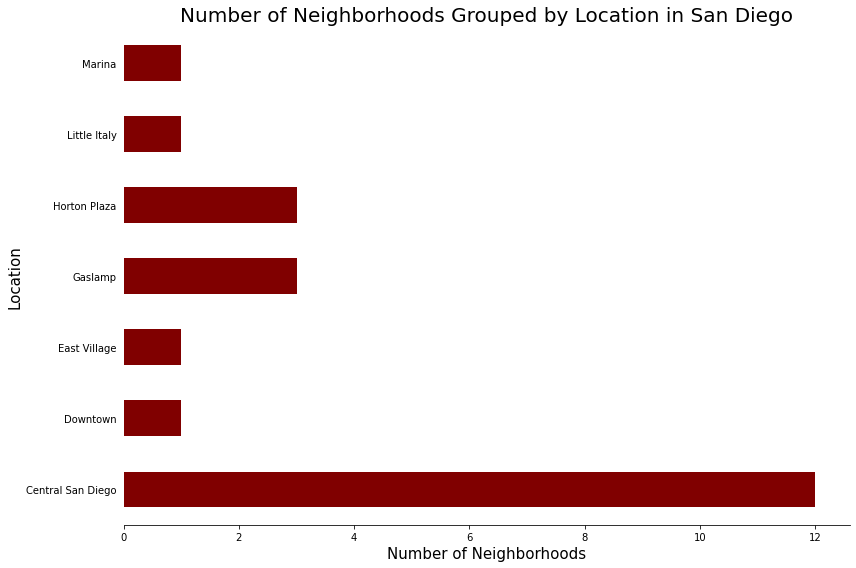

In [22]:
fig = plt.figure(figsize=(12,8))

ax = neighborhoods_sandiego.plot(kind='barh', color='maroon')
ax.set_title('Number of Neighborhoods Grouped by Location in San Diego', fontsize=20)
ax.set_xlabel('Number of Neighborhoods', fontsize=15)
ax.set_ylabel('Location', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(which='major', left=False)

fig.tight_layout()

In [27]:
#print(nearby_venues.shape)
#nearby_venues.head(10)
#nearby_venues.groupby('Neighborhood', as_index=False).count()

sand_onehot = pd.get_dummies(nearby_venues[['Restaurant Name']], prefix="", prefix_sep="")
sand_onehot.head()

,American Restaurant,Bar,Beer Store,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Business Service,Café,Chocolate Shop,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Dessert Shop,Donut Shop,Falafel Restaurant,Farmers Market,Gastropub,Gym,Health Food Store,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lingerie Store,Liquor Store,Lounge,Massage Studio,Mexican Restaurant,Mobile Phone Shop,Music Venue,New American Restaurant,Park,Pedestrian Plaza,Pizza Place,Plaza,Pub,Russian Restaurant,Sandwich Place,Seafood Restaurant,Speakeasy,Sports Bar,Sushi Restaurant,Taco Place,Tattoo Parlor,Theater,Theme Restaurant,Tiki Bar,Turkish Restaurant,Vietnamese Restaurant,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
sand_onehot['Neighborhood'] = nearby_venues['Neighborhood']
sand_onehot.head()

,American Restaurant,Bar,Beer Store,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Business Service,Café,Chocolate Shop,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Dessert Shop,Donut Shop,Falafel Restaurant,Farmers Market,Gastropub,Gym,Health Food Store,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lingerie Store,Liquor Store,Lounge,Massage Studio,Mexican Restaurant,Mobile Phone Shop,Music Venue,New American Restaurant,Park,Pedestrian Plaza,Pizza Place,Plaza,Pub,Russian Restaurant,Sandwich Place,Seafood Restaurant,Speakeasy,Sports Bar,Sushi Restaurant,Taco Place,Tattoo Parlor,Theater,Theme Restaurant,Tiki Bar,Turkish Restaurant,Vietnamese Restaurant,Wine Bar,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Central San Diego
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Central San Diego


In [39]:
temp = list(sand_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
sand_onehot = sand_onehot[fixed_columns]

sand_onehot.head()

,Neighborhood,American Restaurant,Bar,Beer Store,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Business Service,Café,Chocolate Shop,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Dessert Shop,Donut Shop,Falafel Restaurant,Farmers Market,Gastropub,Gym,Health Food Store,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lingerie Store,Liquor Store,Lounge,Massage Studio,Mexican Restaurant,Mobile Phone Shop,Music Venue,New American Restaurant,Park,Pedestrian Plaza,Pizza Place,Plaza,Pub,Russian Restaurant,Sandwich Place,Seafood Restaurant,Speakeasy,Sports Bar,Sushi Restaurant,Taco Place,Tattoo Parlor,Theater,Theme Restaurant,Tiki Bar,Turkish Restaurant,Vietnamese Restaurant,Wine Bar
0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Central San Diego,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Central San Diego,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
sand_grouped = sand_onehot.groupby('Neighborhood', sort=False).mean().reset_index()
print(sand_grouped.shape)
sand_grouped.head(10)

(7, 59)


,Neighborhood,American Restaurant,Bar,Beer Store,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Business Service,Café,Chocolate Shop,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Dessert Shop,Donut Shop,Falafel Restaurant,Farmers Market,Gastropub,Gym,Health Food Store,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lingerie Store,Liquor Store,Lounge,Massage Studio,Mexican Restaurant,Mobile Phone Shop,Music Venue,New American Restaurant,Park,Pedestrian Plaza,Pizza Place,Plaza,Pub,Russian Restaurant,Sandwich Place,Seafood Restaurant,Speakeasy,Sports Bar,Sushi Restaurant,Taco Place,Tattoo Parlor,Theater,Theme Restaurant,Tiki Bar,Turkish Restaurant,Vietnamese Restaurant,Wine Bar
0,Central San Diego,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.083333,0.0,0.0,0.00,0.083333,0.00,0.083333,0.0,0.25,0.0,0.0,0.0,0.083333,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0
1,Horton Plaza,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.25,0.000000,0.25,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,East Village,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Gaslamp,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Downtown,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,0.00,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5,Little Italy,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
6,Marina,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [44]:
num_top_venues = 5

#hood = str(hood)

for hood in sand_onehot['Neighborhood']:
    print("----"+hood+"----")
    temp = sand_onehot[sand_onehot['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Restaurant Name','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 1})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central San Diego----
  Restaurant Name  freq
0  Sandwich Place   0.2
1           Hotel   0.2
2      Beer Store   0.1
3     Pizza Place   0.1
4         Theater   0.1


----Horton Plaza----
       Restaurant Name  freq
0   Mexican Restaurant   0.2
1          Coffee Shop   0.2
2     Pedestrian Plaza   0.2
3                Plaza   0.2
4  American Restaurant   0.0


----East Village----
       Restaurant Name  freq
0                  Gym   1.0
1  American Restaurant   0.0
2                  Pub   0.0
3         Liquor Store   0.0
4               Lounge   0.0


----Gaslamp----
       Restaurant Name  freq
0           Hookah Bar   0.3
1       Chocolate Shop   0.3
2          Comedy Club   0.3
3  American Restaurant   0.0
4   Russian Restaurant   0.0


----Downtown----
       Restaurant Name  freq
0            Speakeasy   1.0
1  American Restaurant   0.0
2                  Pub   0.0
3       Lingerie Store   0.0
4         Liquor Store   0.0


----Little Italy----
       Restaurant Name  freq

In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [46]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sand_grouped['Neighborhood']

for ind in np.arange(sand_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sand_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central San Diego,Sandwich Place,Hotel,Pizza Place,Beer Store,Theater,Coffee Shop,Pub,Sushi Restaurant,Music Venue,Dessert Shop
1,Horton Plaza,Plaza,Mexican Restaurant,Coffee Shop,Pedestrian Plaza,Cosmetics Shop,Hot Dog Joint,Hostel,Hookah Bar,Health Food Store,Gym
2,East Village,Gym,Wine Bar,Cosmetics Shop,Ice Cream Shop,Hotel,Hot Dog Joint,Hostel,Hookah Bar,Health Food Store,Gastropub
3,Gaslamp,Hookah Bar,Chocolate Shop,Comedy Club,Wine Bar,Dessert Shop,Ice Cream Shop,Hotel,Hot Dog Joint,Hostel,Health Food Store
4,Downtown,Speakeasy,Wine Bar,Convenience Store,Hotel,Hot Dog Joint,Hostel,Hookah Bar,Health Food Store,Gym,Gastropub
5,Little Italy,Ice Cream Shop,Wine Bar,Cosmetics Shop,Hotel,Hot Dog Joint,Hostel,Hookah Bar,Health Food Store,Gym,Gastropub
6,Marina,Breakfast Spot,Wine Bar,Cosmetics Shop,Ice Cream Shop,Hotel,Hot Dog Joint,Hostel,Hookah Bar,Health Food Store,Gym


<h2><b>Discussion</b></h2><br>
 By extracting the relevant data from the raw dataset, we can analyze the existing structure to make the decision on the opening of Indian restaurant in San diego

<h2><b>Conclusion</b></h2><br>
From the analysis, there is so far only 1 Indian restaurant with 31 likes where the is better opportunity there to open a new restaurant.